[Link from Kaggle](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho)

# 1. Business Understanding (Problem Statement)

In this project I'm going to analyze the dataset downloaded from Kaggle and try to predict the selling price of used cars. The information of this dataset were extracted from [Cardekho](https://www.cardekho.com/).

Considering that I'm going to predict the selling price of cars, this means that I will implement a `Linear Regression` problem.


## Data Dicionary

* name = The name of the car
* year = The year the car was released
* selling_price = The initial selling price
* km_driven = Killometers already driven
* fuel = The fuel type used in the car
* seller_type = Seller type
* transmission
    * Manual
    * Automatic
* Owner
    * O - No owner
    * 1 - The Owner

In [5]:
# imports the necessary libraries

# data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# show all the plots within the notebook
%matplotlib inline

# train and test split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor

# 2. Data Understanding

In [6]:
# Loading the dataset
df_car = pd.read_csv('car data.csv')

In [7]:
# check the 5 initial lines
df_car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
# check the last 5 rows
df_car.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [9]:
# check the shape of the dataset
df_car.shape

(301, 9)

According to the output above, we have 301 rows and 9 columns (features)

In [10]:
# detailed information about the dataset
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


This dataset contains: n
* No null values;
* 4 Categorical variables
    * Car_Name
    * Fuel_Type
    * Seller_Type
    * Transmission
    * Owner
* 5 Continuous variables
    * Year
    * Selling_Price
    * Present_Price
    * Kms_Driven
    
Output(dependent) feature = Selling Price

In [11]:
# check duplicates
df_car.duplicated().sum()

2

In [12]:
# Output of unique values of all the categorical features

categorical_columns = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
for col in categorical_columns:
    print(f'\nUnique values for variable: {col}')
    print(df_car[col].value_counts())


Unique values for variable: Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

Unique values for variable: Seller_Type
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

Unique values for variable: Transmission
Manual       261
Automatic     40
Name: Transmission, dtype: int64

Unique values for variable: Owner
0    290
1     10
3      1
Name: Owner, dtype: int64


In [13]:
# some statistics about continuous variables

df_car.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [14]:
# some statistics about categorical variables

df_car.describe(include='O')

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


## Ploting some info

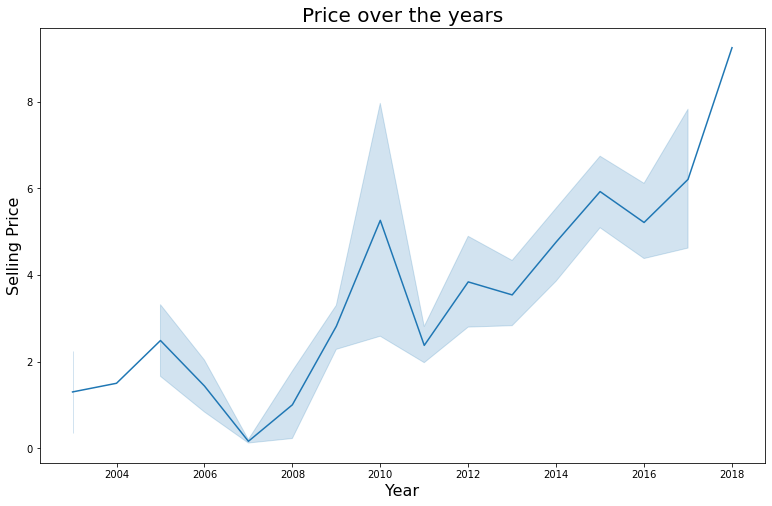

In [15]:
plt.figure(figsize=(13, 8));
plt.title('Price over the years', fontsize=20);
plt.xlabel('Year', fontsize=16);
plt.ylabel('Selling Price', fontsize=16);
sns.lineplot(x = 'Year', y = 'Selling_Price', data = df_car, ci=80, palette='Dark2');

# 3. Data Preparation

Some preprocessing:
* Delete the 2 duplicates
* Drop "Car_Name" column because it has to many unique elements and it has no value to the analysis

In [16]:
# drop duplicates
df_car.drop_duplicates(inplace=True)

In [17]:
# drop column "Car_Name"
df_car.drop(columns=['Car_Name'], inplace=True)

In [18]:
# checking the transformations
df_car.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [19]:
df_car.duplicated().sum()

0

## Feature Engineering

I'll create a new feature called "Current_Year", which I'll use to create another feature named "Number_Year", which is the age of the cars.

In [20]:
# Creation of the new feature - Current Year
df_car['Current_Year'] = 2020
df_car.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [21]:
# Creation of the second feature - Number_Year
df_car['Number_Year'] = df_car['Current_Year'] - df_car['Year']
df_car.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Number_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [22]:
# unique values of Number of Year
df_car['Number_Year'].unique()

array([ 6,  7,  3,  9,  2,  5,  4, 11, 10,  8, 17, 12, 14, 15, 16, 13],
      dtype=int64)

As I don't need the feature "Year" and "Current_Year" anymore, I'll drop them.

In [23]:
# deleting the two features
df_car.drop(columns=['Year', 'Current_Year'], inplace=True)

In [24]:
# checking the transformations
df_car.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_Year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


## Convert Categorical Features

pandas.get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables.

Convert all the categories into One-hot Encoding. Also delete first column to prevent the `dummy variable trap`.

[Dummy Variable Trap](https://www.geeksforgeeks.org/ml-dummy-variable-trap-in-regression-models/)

[DUMMY VARIABLE TRAP IN REGRESSION MODELS](https://www.algosome.com/articles/dummy-variable-trap-regression.html)

In [25]:
# create a new df to allocate these changes
df_final = pd.get_dummies(df_car, drop_first=True)

In [26]:
df_final.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [27]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Selling_Price           299 non-null    float64
 1   Present_Price           299 non-null    float64
 2   Kms_Driven              299 non-null    int64  
 3   Owner                   299 non-null    int64  
 4   Number_Year             299 non-null    int64  
 5   Fuel_Type_Diesel        299 non-null    uint8  
 6   Fuel_Type_Petrol        299 non-null    uint8  
 7   Seller_Type_Individual  299 non-null    uint8  
 8   Transmission_Manual     299 non-null    uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 15.2 KB


## Correlation

In [28]:
corr = df_final.corr()
corr

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.876378,0.028566,-0.087880,-0.234369,0.543541,-0.531636,-0.553851,-0.348869
Present_Price,0.876378,1.000000,0.205253,0.009947,0.053563,0.464849,-0.456746,-0.511686,-0.334265
Kms_Driven,0.028566,0.205253,1.000000,0.089367,0.525714,0.173295,-0.173595,-0.101030,-0.163881
Owner,-0.087880,0.009947,0.089367,1.000000,0.181639,-0.051836,0.054102,0.123646,-0.052166
Number_Year,-0.234369,0.053563,0.525714,0.181639,1.000000,-0.056469,0.052197,0.036820,-0.003434
Fuel_Type_Diesel,0.543541,0.464849,0.173295,-0.051836,-0.056469,1.000000,-0.979104,-0.345882,-0.086264
Fuel_Type_Petrol,-0.531636,-0.456746,-0.173595,0.054102,0.052197,-0.979104,1.000000,0.353865,0.078700
Seller_Type_Individual,-0.553851,-0.511686,-0.101030,0.123646,0.036820,-0.345882,0.353865,1.000000,0.058669
Transmission_Manual,-0.348869,-0.334265,-0.163881,-0.052166,-0.003434,-0.086264,0.078700,0.058669,1.000000


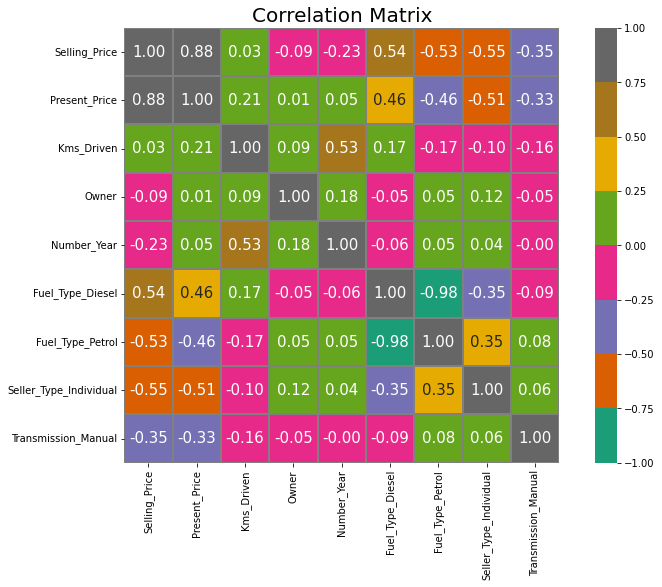

In [29]:
# Plot the correlation
plt.figure(figsize=(13, 8));
plt.title('Correlation Matrix', fontsize=20);
sns.heatmap(corr, annot=True, cmap='Dark2', vmin=-1, vmax=1, center=0, fmt=".2f", square=True,
           annot_kws={'fontsize': 15}, linewidths=1.5, linecolor='gray');

<Figure size 1800x1440 with 0 Axes>

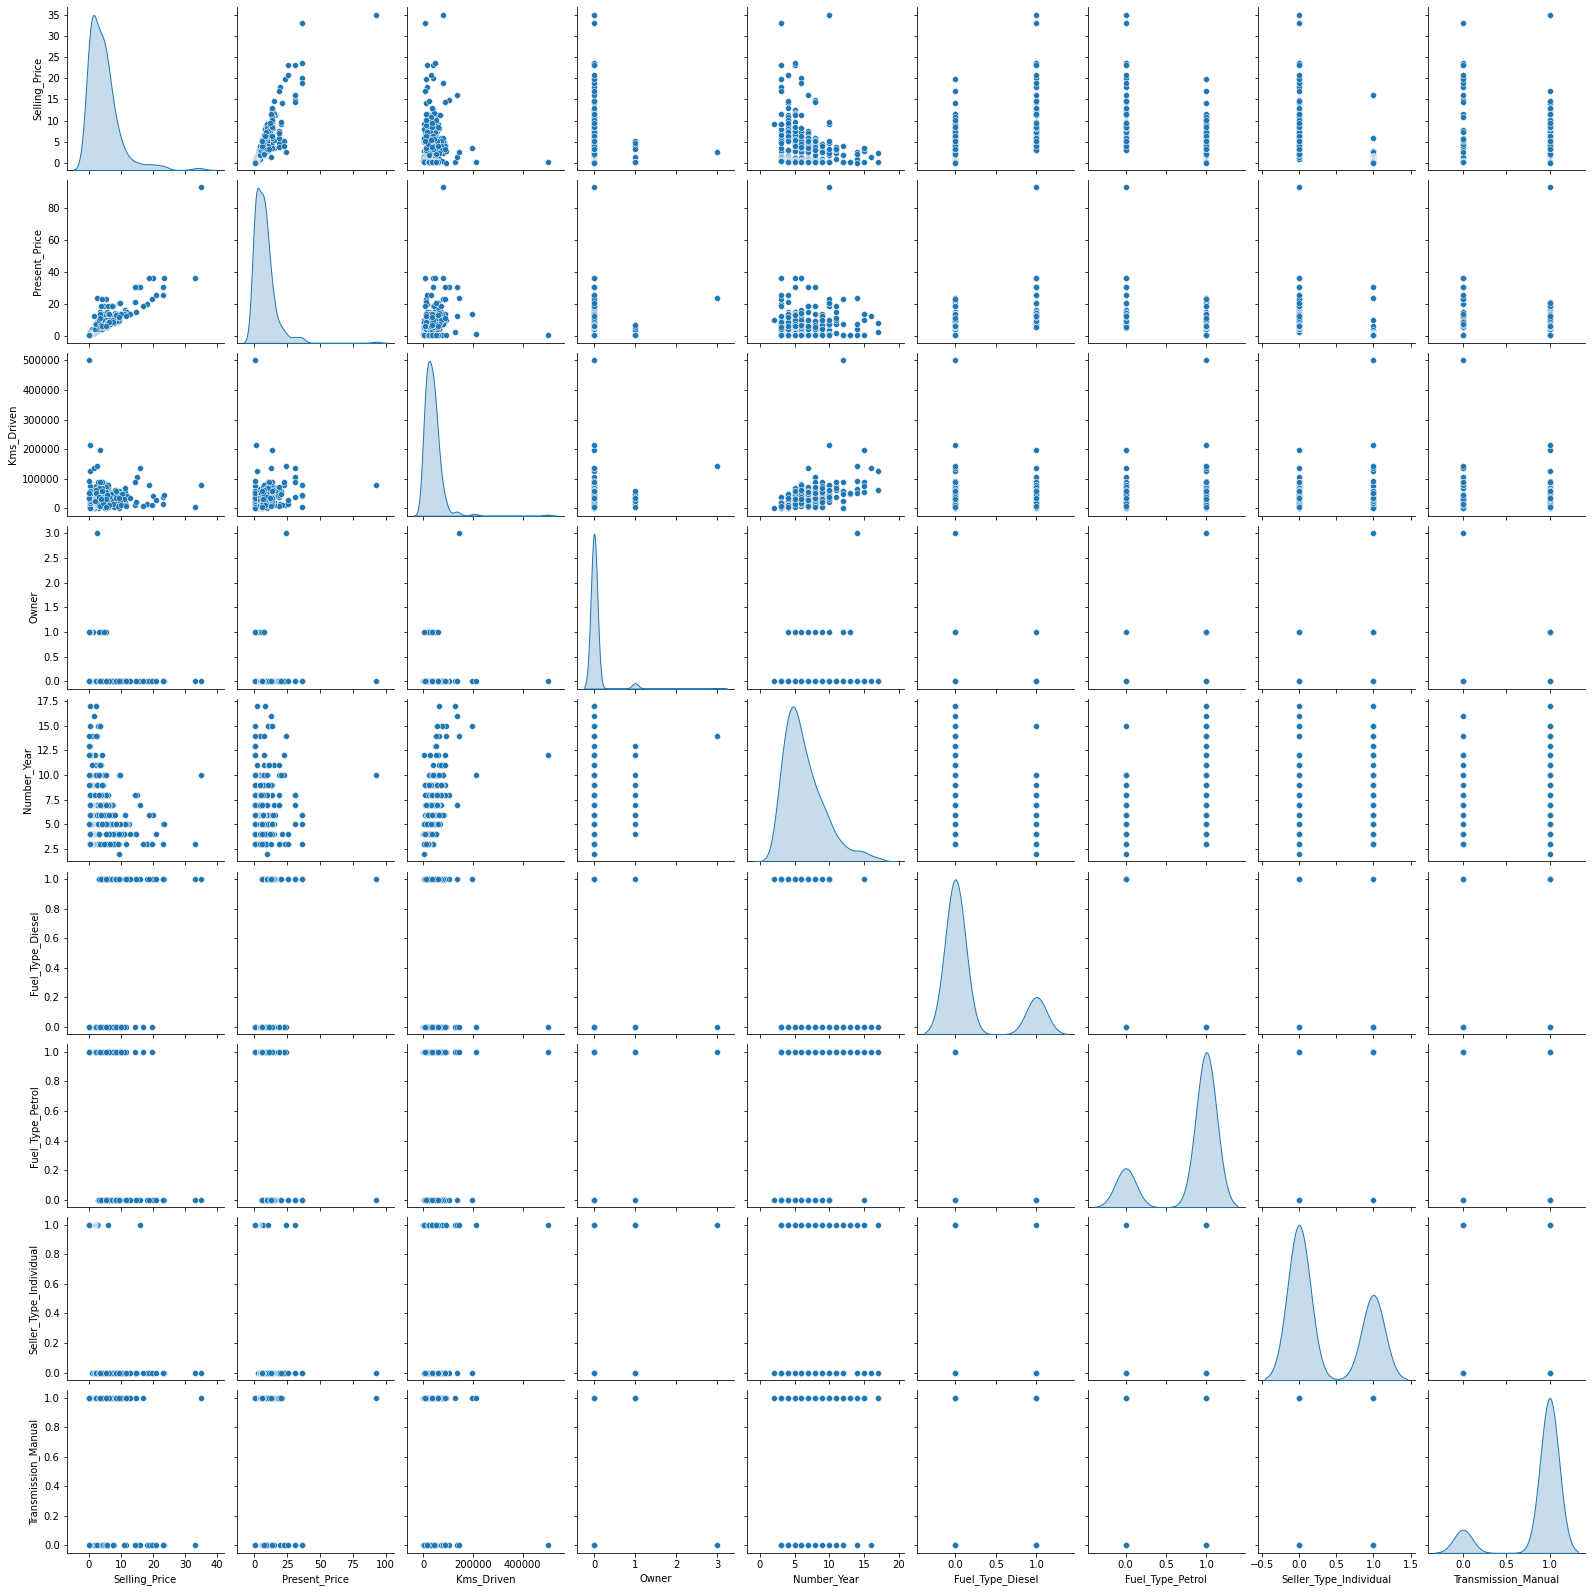

In [30]:
plt.figure(figsize=(25, 20));
sns.pairplot(df_final, diag_kind='kde', palette='Dark2');

# 4. Modelation

In [31]:
# divide the dataset into X (independent features) and y(dependent feature)

X = df_final.drop(columns=['Selling_Price'])
y = df_final.iloc[:,0]

In [32]:
X.head()

,Present_Price,Kms_Driven,Owner,Number_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [33]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

## Feature Importance

In [34]:
model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

In [35]:
X.columns

Index(['Present_Price', 'Kms_Driven', 'Owner', 'Number_Year',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

In [36]:
feat_import = model.feature_importances_
feat_import

array([4.51101409e-01, 4.08341275e-02, 3.10352678e-04, 8.49432397e-02,
       7.42202120e-02, 3.00457817e-02, 2.33436438e-01, 8.51084401e-02])

In [37]:
feat_import = model.feature_importances_

for col, feat_import in enumerate(feat_import):
    print(col, feat_import)

0 0.45110140874158855
1 0.04083412746461
2 0.0003103526775133529
3 0.08494323965470398
4 0.07422021201707434
5 0.03004578169047186
6 0.23343643767488223
7 0.08510844007915579


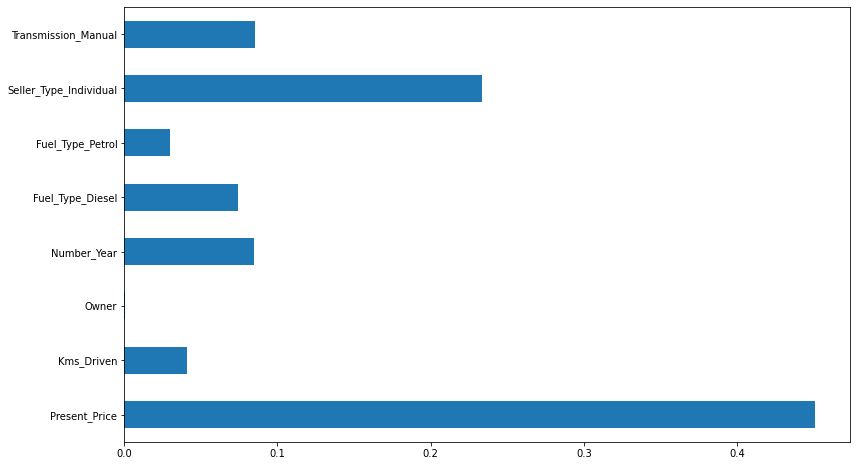

In [38]:
# Plot Feature Importance
plt.figure(figsize=(13, 8));
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.plot(kind='barh');
plt.show()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [41]:
X_train.shape

(239, 8)

In [42]:
y_train.shape

(239,)

In [43]:
X_test.shape

(60, 8)

In [46]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [52]:
from sklearn.model_selection import RandomizedSearchCV

In [49]:
# Hyperparameters

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [54]:
# Randomized GridSearch CV

# number of features to consider at every split
max_features = ['auto', 'sqrt']

#  maximum level in trees
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [55]:
# create a random grid

random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [59]:
# initialize random forest model
rf = RandomForestRegressor()

In [60]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, scoring='neg_mean_squared_error',
                              n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)

In [61]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [62]:
# see the best parameters
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [63]:
# Model Prediction
predictions = rf_random.predict(X_test)

In [64]:
predictions

array([ 3.88719073,  1.21616754,  5.38687744,  0.37426084,  0.8385677 ,
        5.81081818,  0.27901241,  2.77920829,  1.21893649,  7.81176759,
        4.47923607,  0.7184919 ,  5.16254502,  4.47025201,  2.78698271,
        0.24778501,  2.83348631,  0.24832072,  7.25219498,  4.06912128,
        6.54279365,  8.87430838,  0.23209118,  5.63025469, 14.24428048,
        0.3730715 ,  8.06439202,  9.38505652,  1.22244098,  5.50538866,
        7.19770784,  9.16129414,  4.16661713,  0.42981426,  6.19839835,
        3.98072722,  1.23143834,  1.23729994,  1.22067875,  2.02224811,
        0.59976842,  5.8325141 ,  5.55260867,  4.06356134,  4.62820901,
        3.14093125,  4.38776878,  5.05635722, 21.44121969,  8.9861074 ,
        0.37527495,  8.70480352,  5.4475624 ,  3.55530303,  8.43090145,
        5.01219531,  9.09417305,  0.37571491,  4.82342278,  5.6539578 ])

In [85]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

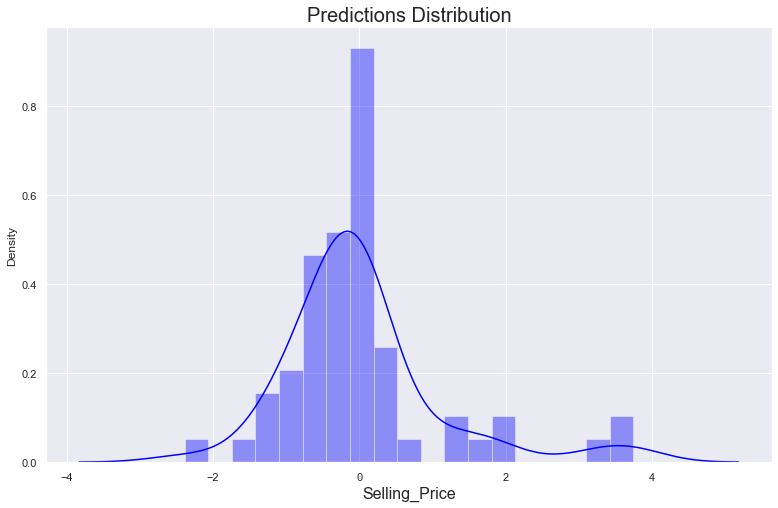

In [97]:
plt.figure(figsize=(13, 8));
plt.title('Predictions Distribution', fontsize=20);
plt.xlabel('Selling Price', fontsize=16);
sns.distplot(y_test - predictions, color= 'blue');

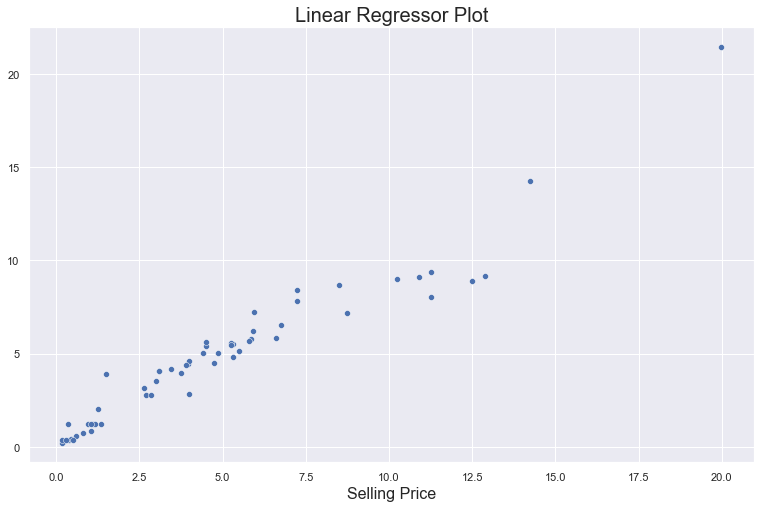

In [101]:
plt.figure(figsize=(13, 8));
plt.title('Linear Regressor Plot', fontsize=20)
plt.xlabel('Selling Price', fontsize=16);
sns.scatterplot(y_test, predictions);

It shows a linear plot, which confirms a good prediction model.

In [109]:
import pickle

# open a file, where you want to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)